## Problem 1.
Using a watershed segmentation, try to segment the image of a brain into the three major tissue types (skin [bright], Cerebal Spinal fluid [dark], and brain).  You will most likely want to use a combination of steps to first segment the whole head from the back ground and then segment the tissue into types.  

Comment out the arrows/text (they are just to show you the tissue types).  Work in gray scale.

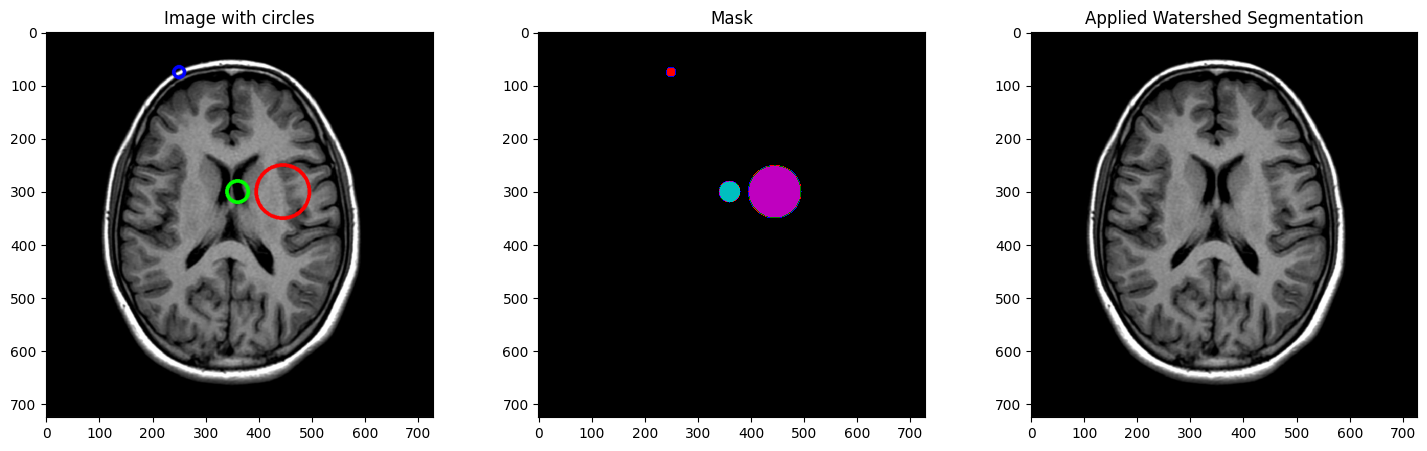

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread(os.path.relpath('data/MRI_brain.png'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#cv2.arrowedLine(img, (100, 100), (175,150),(255,0,0), 3)
#cv2.putText(img, "Skin", (60,90),cv2.FONT_HERSHEY_PLAIN,2,(255,0,0),2,cv2.LINE_AA)

#cv2.arrowedLine(img, (50, 250), (160,250),(0,255,0), 3)
#cv2.arrowedLine(img, (50, 300), (330,300),(0,255,0), 3)
#cv2.putText(img, "Spinal Fluid", (0,240),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),2,cv2.LINE_AA)

#cv2.arrowedLine(img, (50, 400), (250,400),(0,0,255), 3)
#cv2.putText(img, "Brain", (20,390),cv2.FONT_HERSHEY_PLAIN,2,(0,0,255),2,cv2.LINE_AA)

imagelabeled = img.copy()  # I'll use this to show the annotations
markers = np.zeros((img.shape[0],img.shape[1]),dtype='int32') # but, this is our actual marker image

cv2.circle(imagelabeled, (250,75), 10, (0, 0, 255), thickness=5)
cv2.circle(imagelabeled, (445,300), 50, (255, 0, 0), thickness=5)
cv2.circle(imagelabeled, (360,300), 20, (0, 255, 0), thickness=5)

cv2.circle(markers, (250,75), 10, 1, thickness=-1)
cv2.circle(markers, (445,300), 50, 2, thickness=-1)
cv2.circle(markers, (360,300), 20, 3, thickness=-1)

markersWS = cv2.watershed(img,markers.copy())

plt.figure(figsize=[18, 5])


from matplotlib.colors import ListedColormap
plt.subplot(131); plt.imshow(imagelabeled);plt.title('Image with circles')
plt.subplot(132); plt.imshow(markers,cmap=ListedColormap(['k','b','r','g','m','c'])); plt.title('Mask')
plt.subplot(133); plt.imshow(markersWS); plt.title('Applied Watershed Segmentation')

plt.imshow(img,cmap='gray')

## Problem 2.
Digital segmentation methods have been widely used in medical pathology to automate methods that used to be done by hand.  One example of this is counting the number of cells in an image.  In this problem, you will use the image of red blood cells.  Design a segmentation approach similar to the demo using contours to attempt to count the number of cells in the image.    


Image credit ShutterStock

The number of contours identified is: 124


Text(0.5, 1.0, 'Original Image')

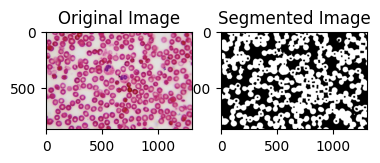

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
img = cv2.imread(os.path.relpath('data/CellCounting.png'))
im = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# First, we need to start off with a threshold that seperates the objects and background 
im_gray = cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)

_,thres = cv2.threshold(im_gray,np.mean(im_gray),255,cv2.THRESH_BINARY_INV)

# Let's close the image up a bit
kernel = np.ones((3,3),np.uint8)
thres = cv2.morphologyEx(thres,cv2.MORPH_CLOSE,kernel,iterations=5)

#plt.imshow(thres,cmap='gray')

contours,hierarchy = cv2.findContours(thres,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

print("The number of contours identified is:",len(contours))

plt.subplot(132); plt.imshow(thres,cmap='gray');plt.title('Segmented Image')
plt.subplot(131); plt.imshow(im);plt.title('Original Image')


## Problem 3
Use the K-means segmetation method based on RGB colors to try to seperate the CitySkyline image into several components.  Play around with the number of clusters and show at least three images with different parameters.


Image source: https://pxhere.com/en/photo/705594 (Image of Minneapolis, MN)


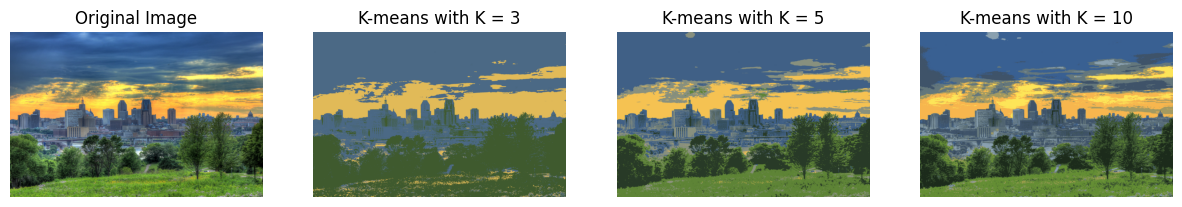

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(os.path.relpath('data/CitySkyline.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)



# Reshape the image to a 2D array of pixels 
img_vector = img.reshape((-1, 3))

# Convert to float32 for k-means
img_vector = np.float32(img_vector)

# K = 3 implementation 
K = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
compactness, label, center = cv2.kmeans(img_vector, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
segmented_image_k3 = center[label.flatten()].reshape(img.shape)

# K-means with K = 5
K = 5
compactness, label, center = cv2.kmeans(img_vector, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
segmented_image_k5 = center[label.flatten()].reshape(img.shape)

# K-means with K = 10
K = 10
compactness, label, center = cv2.kmeans(img_vector, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
segmented_image_k10 = center[label.flatten()].reshape(img.shape)

# creating plot to display all images 
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(141)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# K = 3
plt.subplot(142)
plt.imshow(segmented_image_k3)
plt.title('K-means with K = 3')
plt.axis('off')

# K = 5
plt.subplot(143)
plt.imshow(segmented_image_k5)
plt.title('K-means with K = 5')
plt.axis('off')

# K = 10
plt.subplot(144)
plt.imshow(segmented_image_k10)
plt.title('K-means with K = 10')
plt.axis('off')

plt.show()

## Problem 4
Following the example from class of using the openCV BackgroundSubtractor modules with video 
from a web camera, implement a similar while-loop to grab video frames and apply the background subtraction  method to 
mask the video.

* Demonstrate the use of the three versions of this method in openCV    

*       cv2.createBackgroundSubtractorMOG()
*       cv2.createBackgroundSubtractorMOG2()
*       cv2.createBackgroundSubtractorGMG()

For ECE2390 students

* Examine how at least two of the parameters (such as number of gaussian clusters or the 'history' parameter ).  
Note your observations in comments in the code.



In [5]:
# Create the background subtractor object
fgbg = cv2.createBackgroundSubtractorMOG2()
kernel = np.ones((3,3),np.uint8)


alive = True

win_name = "Camera Filters"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
result = None
source = cv2.VideoCapture(0)

while alive:
    has_frame, frame = source.read()
    if not has_frame:
        break

    frame = cv2.flip(frame, 1)

    # applying on each frame 
    fgmask = fgbg.apply(frame)

    # This is from the demo on erosion and dilation
    fgmask=(cv2.morphologyEx(fgmask,cv2.MORPH_CLOSE,kernel,iterations=10)>100)

    # use the mask to remove the background
    frame[:,:,0]=frame[:,:,0]*fgmask
    frame[:,:,1]=frame[:,:,1]*fgmask
    frame[:,:,2]=frame[:,:,2]*fgmask

    cv2.imshow(win_name, frame)

    key = cv2.waitKey(1)
    if key == ord("Q") or key == ord("q") or key == 27:
        alive = False
   